$\newcommand{\ax}{\mathbf{a}_x}$
$\newcommand{\ay}{\mathbf{a}_y}$
$\newcommand{\az}{\mathbf{a}_z}$
$\newcommand{\arho}{\mathbf{a}_\rho}$
$\newcommand{\ap}{\mathbf{a}_\phi}$
$\newcommand{\ar}{\mathbf{a}_r}$
$\newcommand{\at}{\mathbf{a}_\theta}$
$\newcommand{\grad}[1]{\nabla #1}$
$\renewcommand{\div}[1]{\mathbf{\nabla} \cdot \mathbf{#1}}$
$\newcommand{\rot}[1]{\mathbf{\nabla} \times \mathbf{#1}}$
$\newcommand{\parcial}[2]{\displaystyle\frac{\partial #1}{\partial #2}}$
$\newcommand{\pard}[2]{\displaystyle\frac{\partial^2 {#1}}{\partial {#2}^2}}$
$\newcommand{\lapcart}[1]{\pard{#1}{x}+\pard{#1}{y}+\pard{#1}{z}}$
$\newcommand{\lapcili}[1]{\frac{1}{\rho}\parcial{}{\rho}\left(\rho \parcial{#1}{\rho}\right)+\frac{1}{\rho^2}\pard{#1}{\phi}+\pard{#1}{z}}$
$\newcommand{\lapesf}[1]{\frac{1}{r^2}\parcial{}{r}\left(r^2 \parcial{#1}{r}\right)+\frac{1}{r^2\sin \theta }\left(\sin \theta \, \parcial{#1}{\theta}\right)+\frac{1}{r^2\sin \theta}\pard{V}{\phi}}$



# Equações de Poisson e Laplace

São equações *diferenciais parciais* provenientes das leis de campo elétrostático, para determinarmos o campo potencial elétrico em um problema.

O potencial é escolhido por ser uma grandeza física de mais fácil medida.

## Equação de Poisson

$$
\begin{align*}    
    \div{D} &= \rho_v\\
    \mathbf{D} &= \epsilon\,\mathbf{E}\\
    \mathbf{E} &= -\grad{V}\\
    \Rightarrow \nabla \cdot{(-\epsilon\grad{V})} &= \rho_v\\
    \nabla^2{V} &= \frac{-\rho_v}{\epsilon}
\end{align*}
$$

## Equação de Laplace

É a equação de Poisson quando $\rho_v=0$
$$
\begin{align*}    
    \nabla^2{V} &= 0
\end{align*}
$$



## Laplaciano em diferentes sistemas de coordenadas

Cartesiano:
$$
\nabla^2V = \lapcart{V}
$$

Cilíndrico:
$$
\nabla^2V = \lapcili{V}
$$

Esférico:
$$
\nabla^2V = \lapesf{V}
$$

## Teorema da unicidade:

Dado um problema e uma condição de fronteira específica, a solução do problema, se puder ser encontrada, é única.

Isso é importante devido à natureza das equações diferenciais, cuja solução geral às vezes representa um número infinito de soluções. 

## Técnicas de solução

- Simplificação + Integração direta
- Separação de variáveis
- Métodos numéricos

## Alguns exemplos:

<center> <img src='./Figs/Ex6.1.svg'> </center>

In [164]:
import sympy as sp
from sympy import pi, Function, dsolve, Derivative

In [165]:
z = sp.symbols('z')
ro = 25e-3
Vo = 22e3
e0 = 1e-9/(36*pi)
eps = sp.symbols(r'\varepsilon')
rho_v = sp.symbols('rho_0')
Vo = sp.symbols('V_o')
d = sp.symbols('d')
V = Function('V')

In [166]:
sol = dsolve( Derivative(V(z),z,2)+rho_v/eps, 
             V(z), ics={ V(0):Vo,  V(d):0}  )
sol.rhs

V_o - rho_0*z**2/(2*\varepsilon) + z*(-2*V_o*\varepsilon + d**2*rho_0)/(2*\varepsilon*d)

<center> <img src='./Figs/Ex6.2.svg'> </center>

In [167]:
x = sp.symbols('x')
A1, B1, A2, B2, d, a = sp.symbols("A_1 B_1 A_2 B_2 d a")
rho_s, e1, e2 = sp.symbols("rho_s epsilon_1 epsilon2")
V1 = A1*x+B1
V2 = A2*x+B2
eq1 = sp.Eq(0,V1.subs(x,d))
eq2 = sp.Eq(0,V2.subs(x,0))
eq3 = sp.Eq(V1.subs(x,a),V2.subs(x,a))
eq4 = sp.Eq(rho_s, -e1*Derivative(V1,x).doit().subs(x,a)+
            e2*Derivative(V2,x).doit().subs(x,a))
sis = [eq1,eq2,eq3,eq4]
sol = sp.solve(sis,[A1,A2,B1,B2])
-Derivative(V2.subs(sol),x).doit()

-(a*rho_s - d*rho_s)/(a*epsilon2 - a*epsilon_1 - d*epsilon2)

<center> <img src='./Figs/Ex6.3.svg'> </center>

Pelas condições do exemplo 6.3, o potencial só depende de $\phi$, isto é $V = V(\phi)$.

Não temos distribuiçõs de carga, logo $\rho_v=0$. A equação a resolver é a de Laplace.

Em coordenadas cilíndricas o Laplaciano vai ser:
$$
    \frac{1}{\rho^2}\frac{\partial^2 V}{\partial \phi^2} = 0
$$

Devemos supor que $\rho\neq 0$, pois o problema diz que os planos são separados por uma fenda. Assim a equação simplifica para:
$$
    \frac{d^2 V}{d \phi^2} = 0
$$

As condições de contorno são: $V(0) = 0$ e $V(\phi/6)=100 V$. 

A solução já vimos:
$$
    V(\phi) = C_1 \phi + C_2
$$

Podemos resolver diretamente com *dsolve*

In [168]:
rho, phi, z = sp.symbols('rho phi z')
sol = dsolve( Derivative(V(phi), phi, 2), ics= {V(0): 0, V(pi/6):100})
sol

Eq(V(phi), 600*phi/pi)

Para achar o campo, usamos $\mathbf{E}=-\nabla V$, com o operador del em coordenadas cilíndricas. 

In [169]:
def grad_cili(V):
    return sp.Matrix([sp.diff(V,rho), 
                      (1/rho)* sp.diff(V,phi), 
                      sp.diff(V,z)])

E = -grad_cili(sol.rhs)
display(E)    

Matrix([
[            0],
[-600/(pi*rho)],
[            0]])

<center> <img src='./Figs/Ex6.4.svg'> </center>

Esse é um problema que podemos simplificar para uma dimensão também. No caso, a variação é cônica, que em coordenadas esféricas podemos trabalhar com $V = V(\theta)$. Não há cargas livres, então novamente temos a equação de Laplace. As condições de contorno são $V(\pi/10)=0$ e $V(\pi/6)=50 V$.

Usando coordenadas esféricas, focando apenas na parcela que depende de $\theta$, o laplaciano fica:

$$
    \frac{1}{r^2 \sin \theta} \frac{d}{d\theta} \left(\sin \theta \frac{dV}{d \theta}\right) = 0
$$

As condições do problema excluem $r = 0$ e $\sin \theta = 0$, logo podemos simplificar:
$$
    \frac{d}{d\theta} \left(\sin \theta \frac{dV}{d \theta}\right) = 0
$$


Resolvendo:
$$\begin{align}
    \sin \theta \,\frac{dV}{d\theta} &= C_1\\
    \frac{dV}{d\theta} &= \frac{C_1}{\sin \theta}\\
    V &= \int \frac{C_1\, d\theta}{\sin \theta}
\end{align}$$

A última integral pode ser resolvida por substituição. O resultado é:

In [170]:
V = Function('V')
theta = sp.symbols('theta')
sol = dsolve(Derivative(sp.sin(theta)*Derivative(V(theta),theta),theta),ics={V(pi/10):0,V(pi/6):50})
sol.evalf(4)

Eq(V(theta), 47.55*log(cos(theta) - 1) - 47.55*log(cos(theta) + 1) + 175.2 - 149.4*I)

In [171]:
r, theta, phi = sp.symbols('r theta phi', real=True)
sp.Eq(sp.Integral(1/sp.sin(theta)),
       sp.integrate(1/sp.sin(theta)))

Eq(Integral(1/sin(theta), theta), log(cos(theta) - 1)/2 - log(cos(theta) + 1)/2)

Esse resultado difere um pouco do que está no livro. Precisamos ter cuidado com ele, pois não queremos resultados complexos que a função log pode dar, caso o argumento seja negativo. Da forma como está escrito, ela vai resultar em valores imaginários.

Para evitar isso, temos que lembrar que o log resultante de integrais deve ter o argumento modulado. Assim, o correto no resultado acima, deveria ser:


$$
    V(\theta) = \frac{C_1}{2}\, \log\left|\frac{\cos \theta -1}{\cos \theta +1}\right| + C_2
$$

No entanto, como em coordenadas esféricas $0< \theta < \pi$, então podemos escrever seguramente:
$$
    V(\theta) = \frac{C_1}{2}\, \log\left(\frac{1-\cos \theta}{\cos \theta +1}\right) + C_2
$$

Com isso podemos resolver $C_1$ e $C_2$. Observação: utilizar diretamente o dsolve obtemos problema, haja vista que o sympy falha em reconhecer a transformação acima e acaba fornecendo valores complexos para o potencial. 

In [172]:
from sympy import log, cos, sin, Eq
C1, C2 = sp.symbols('C_1 C_2')
V = (C1/2)*log(abs((1-cos(theta))/(cos(theta)+1)))+C2
V

C_1*log(Abs((cos(theta) - 1)/(cos(theta) + 1)))/2 + C_2

In [173]:
eq1 = Eq(V.subs(theta,pi/10),0)
eq2 = Eq(V.subs(theta,pi/6),50)
display(eq1)
display(eq2)
sol = sp.solve([eq1, eq2])
V = V.subs(sol)
# Notar que o resultado exato é extenso. Use evalf() para encurtar
V.evalf(4)

Eq(C_1*log((1 - sqrt(sqrt(5)/8 + 5/8))/(sqrt(sqrt(5)/8 + 5/8) + 1))/2 + C_2, 0)

Eq(C_1*log((1 - sqrt(3)/2)/(sqrt(3)/2 + 1))/2 + C_2, 50)

47.55*log(Abs((cos(theta) - 1)/(cos(theta) + 1))) + 175.2

In [174]:
# Para o campo, basta calcular agora o gradiente
def grad_esf(V):
    return sp.Matrix([sp.diff(V,r), 
                      (1/r)* sp.diff(V,theta), 
                      (1/(r*sin(theta)))*sp.diff(V,phi)])

E = grad_esf(V).evalf(4)
# Este último passo é necessário para simplificar as expressões trigonométricas
E = sp.ImmutableMatrix([e.simplify() for e in E])
display(E)

Matrix([
[                                                                                                                                                                         0],
[Piecewise((0, Eq((cos(theta) - 1)/(cos(theta) + 1), 0)), ((95.1*sin(theta) - 47.55*sin(2*theta))/(r*(cos(theta) + 1)**3*Abs((cos(theta) - 1)/(cos(theta) + 1))**2), True))],
[                                                                                                                                                                         0]])

<center> <img src='./Figs/Ex6.5.svg'> </center>

Esse é um problema dimensional. Pelas condições do problema, deve ficar evidente que precisamos resolver a equação de Laplace para $V(x,y)$, com as condições de fronteira:

$$
\begin{align}
    V(0,y) &= 0\\
    V(b,y) & =0\\
    V(x,0) &= 0\\
    V(x,a) & = V_o = 100
\end{align}
$$
onde $0<x<b$, $0<y<a$. 

A equação de Laplace é:
$$
    \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0
$$

Resolvemos esse tipo de problema propondo uma função separável $V(x,y)=F(x)G(y)$. 

Ao fazer isso concluímos que as funções $F$ e $G$ devem satisfazer as equações ordinárias:
$$
    \frac{d^2 F}{dx^2}= -\lambda F(x)
$$
e
$$
    \frac{d^2 G}{dy^2}= \lambda G(y)
$$

Onde $\lambda$ é uma constante. O livro faz uma análise bem detalhada das possibilidades para $\lambda$ e chega a conclusão que a única de interesse é $\lambda = \beta^2$ um número real positivo. 

Aplicação das condições de fronteira mostram que $\beta = \frac{n\pi}{b}$, onde $n$ é um inteiro, o que resulta:
$$
    F_n(x) = a_n\, \sin \frac{n\pi x}{b}
$$

Utilizando o valor de $\beta$ e as condições de fronteira na equação para $G(y)$, resulta:
$$
    G_n(y) = b_n \sinh\frac{n\pi y}{b}
$$ 

Assim a solução do potencial é:
$$
    V_n(x,y) = c_n \sin\left(\frac{n\pi x}{b}\right)\sinh\left(\frac{n\pi y}{b}\right)
$$

Note que usamos o índice $n$ porque para cada $n$ diferente, temos um $\beta$ diferente, que produz uma função $V_n$ diferente. 

Como a equação é linear, ela obedece ao princípio da superposição. Dessa maneira, a solução geral da equação é uma combinação linear de cada uma dessas soluções de índice $n$. 

$$
    V(x,y) = \sum_{n=1}^\infty c_n \sin\left(\frac{n\pi x}{b}\right)\sinh\left(\frac{n\pi y}{b}\right)
$$

Para finalizar, precisamos determinar as constantes $c_n$. Usando as condições de fronteira em $y$, temos que:
$$
    V(x,a) = \sum_{n=1}^\infty c_n \sin\left(\frac{n\pi x}{b}\right)\sinh\left(\frac{n\pi a}{b}\right)
$$

Vemos que $c_n\sinh\left(\frac{n\pi a}{b}\right)$ são os coeficientes da série Fourier seno da funçÃo $V(x,a)$, considerando um intervalo $0<x<b$. Então: 
$$
    c_n\sinh\left(\frac{n\pi a}{b}\right) = \frac{2}{b} \int_{0}^b V(x,a) \sin\left(\frac{n\pi x}{b}\right)\,dx
$$

Logo:
$$
    c_n = \frac{2}{b\,\sinh\left(\frac{n\pi a}{b}\right)}\int_{0}^b V(x,a) \sin\left(\frac{n\pi x}{b}\right)\,dx
$$

Então, no nosso caso presente, basta resolver a integral de Fourier para a função $V(x,a)$ dada, que é apenas uma constante. 

Antes de finalizar, é importante consolidar o procedimento todo. Você não precisa resolver tudo novamente! Dada uma equação de Laplace  com a geometria fornecida, basta calcular $c_n$ e substituir na expressão geral. Note porém, que isso só vale para as condições de fronteira constantes fornecidas no problema. 

Para o problema em questão $V(x,a)=V_o = 100$

In [175]:
from sympy import symbols, pi, sinh, sin, pi, Integral, latex
from IPython.display import display, Math
x = symbols('x')
a, b, Vo= symbols('a b V_o', positive = True)
n = symbols('n', integer = True, positive=True)
cn  = (2/(b*sinh(n*pi*a/b))) * Integral(Vo * sin(n*pi*x/b), (x,0,b))
display(Math('c_n = ' + latex(cn) + '= ' + latex(cn.doit())))

<IPython.core.display.Math object>

In [176]:
k = symbols('k', integer = True)
cn = cn.doit()
(cn.subs(n,2*k+1))

4*V_o/(pi*(2*k + 1)*sinh(pi*a*(2*k + 1)/b))

In [177]:
import sympy as sp
y, N = symbols('y N')

In [178]:
V = sp.Sum(cn*sin(n*pi*x/b)*sinh(n*pi*y/b), (n,1,N))
display(Math('V(x,y) = ' + latex(V)))
display(Math('V(x,y) = ' + latex(V.subs(N,5).doit())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note que a solução não é "fácil" de entender, mas podemos usá-la para calcular $V$ em qualquer ponto que quisermos. 

Para o item (b), queremos determinar $V(a/2, 3a/4)$ quando $b=2a$.  

In [179]:
Vxy = V.subs([(b,2*a),(x,a/2),(y,3*a/4)]).simplify()
display(Vxy)

2*V_o*Sum((1 - (-1)**n)*sin(pi*n/4)*sinh(3*pi*n/8)/(n*sinh(pi*n/2)), (n, 1, N))/pi

Podemos avaliar $V$ com quantos termos quisermos, quanto mais termos mais preciso é o resultado. Porém, há um momento que adicionar novos termos não melhora o resultado.

In [180]:
display(Vxy.subs(N,3).doit().evalf(4))
display(Vxy.subs(N,7).doit().evalf(4))
display(Vxy.subs(N,13).doit().evalf(4))
display(Vxy.subs(N,23).doit().evalf(4))

0.6675*V_o

0.634*V_o

0.6376*V_o

0.6375*V_o

Podemos visualizar melhor funções de duas variáveis usando gráficos de superfície ou de contorno. A seguir segue um código que permite construir esse tipo de gráfico.

In [181]:
fV = V.subs([(a,1),(b,1),(Vo,100),(N,17)]).doit().evalf()
Vxy = sp.lambdify((x,y),fV)

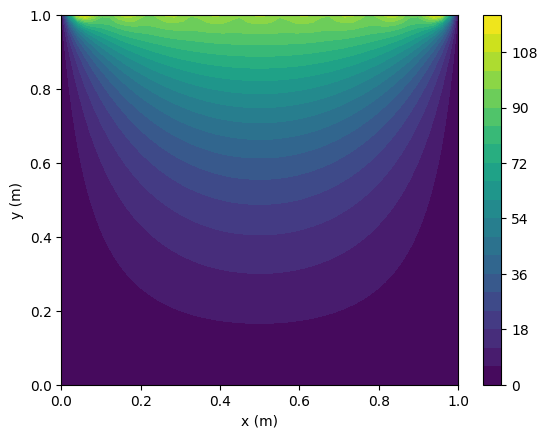

In [182]:
from numpy import meshgrid, linspace
xx = linspace(0,1,50)
yy = linspace(0,1,50)
[X,Y] = meshgrid(xx,yy)
VV = Vxy(X,Y)
from matplotlib.pyplot import contour
from matplotlib import pyplot as plt
plt.contourf(X,Y,VV,levels=20)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.show()

<center> <img src='./Figs/Ex6.6.svg'> </center>

Neste caso, a condição de contorno mudou para $V(x,a) = V_o(x)$. Só utilizamos essa informação no final, para determinar os coeficientes $c_n$. Então:

In [183]:
c = Function('c')
V = sp.Sum(c(n)*sin(n*pi*x/b)*sinh(n*pi*y/b), (n,1,N))
display(Math('V(x,y) = ' + latex(V)))
Vo = 10*sin(3*pi*x/b)
c  = lambda n: (2/(b*sinh(n*pi*a/b))) * Integral(Vo * sin(n*pi*x/b), (x,0,b))
display(Math('c_n = ' + latex(c(n))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Vamos resolver:

In [184]:
display(Math('c_n = ' + latex(c(n).doit())))

<IPython.core.display.Math object>

In [185]:
# Calcula os coeficientes e substitui
V_itemb = sp.Sum(c(n)*sin(n*pi*x/b)*sinh(n*pi*y/b), (n,1,N))
# Avalia a soma com 10 termos
display(V_itemb.subs(N,5).doit())

10*sin(3*pi*x/b)*sinh(3*pi*y/b)/sinh(3*pi*a/b)

Para o item (c)

In [186]:
Vo = 2*sin(pi*x/b)+(1/10)*sin(5*pi*x/b)
c  = lambda n: ((2/(b*sinh(n*pi*a/b))) * \
                Integral(Vo * sin(n*pi*x/b), (x,0,b))).doit()
# Calcula os coeficientes e substitui
V_itemc = sp.Sum(c(n)*sin(n*pi*x/b)*sinh(n*pi*y/b), (n,1,N))
display(c(n))
# Avalia a soma com 10 termos
display(V_itemc)

0

Sum(0, (n, 1, N))

Infelizmente esse é um exemplo em que o sympy falha ao calcular os resultados condicionais a $n$. Então, precisamos usar um pouco da teoria de Fourier e lembrar que as integrais de seno só serão diferentes de $0$ para $n=1$ e $n=5$.

In [187]:
from numpy import arange
[c(n) for n in arange(1,10)]

[2.0/sinh(pi*a/b), 0, 0, 0, 0.1/sinh(5*pi*a/b), 0, 0, 0, 0]

In [188]:
V = 0
for n in arange(1,10):
    V+= c(n)*sin(n*pi*x/b)*sinh(pi*x*n/b)

display(V) 

2.0*sin(pi*x/b)*sinh(pi*x/b)/sinh(pi*a/b) + 0.1*sin(5*pi*x/b)*sinh(5*pi*x/b)/sinh(5*pi*a/b)

<center> <img src='./Figs/Ex6.7.svg'> </center>